# YOLO
https://github.com/ultralytics/yolov5

In [6]:
import pandas as pd
import numpy as np
import os,glob,shutil
from PIL import Image

# DATA PREPARATION

In [35]:
def create_Yolo(df,OUTPUT_PATH):
    category_id_to_name = {'person':0 , 'car':1}
    df1_grouped = df.groupby(by="filename")

    for group_name, df_group in df1_grouped:

                bboxex = []
                file_name = group_name.split('.')[0]


                for row_index, row in df_group.iterrows():
                    w = row['xmax'] - row['xmin']
                    h = row['ymax'] - row['ymin']
                    x_center = row['xmin'] + w/2
                    y_center = row['ymin'] +h/2
                    x_center /= row['width']
                    y_center /= row['height']

                    w /= row['width']
                    h /= row['height']

                    bboxex.append([category_id_to_name.get(row['class']),x_center,y_center,w,h])
                    #print(bboxex)
                    #print(convert([row['width'],row['height']], [row['xmin'],row['xmax'],row['ymin'],row['ymax']]))
                bboxex = np.array(bboxex)
                np.savetxt(OUTPUT_PATH.format(file_name),
                          bboxex,
                          fmt = ["%d","%f","%f","%f","%f"])
            
            
                
                 
                
                
                

In [26]:
df = pd.read_csv('training/train.csv')
create_Yolo(df,'data/label/train/{}'.txt)
df.head()

filename  width  height   class  xmin  ymin  xmax  ymax
0  image_000000001.jpg   1024     768  person   846   145   992   622
1  image_000000001.jpg   1024     768  person   848   216  1023   767
2  image_000000001.jpg   1024     768     car    74   159   149   240
3  image_000000001.jpg   1024     768     car   153   124   811   767
4  image_000000002.jpg   1024     576  person   488   281   516   352

In [40]:
df = pd.read_csv('training/test.csv')
create_Yolo(df,'data/label/test/{}'.txt)
df.head()


filename  width  height   class  xmin  ymin  xmax  ymax
0  image_000000003.jpg   1024     683  person     8     0    88   609
1  image_000000003.jpg   1024     683  person    57    32   208   288
2  image_000000003.jpg   1024     683  person   167     0   456   648
3  image_000000003.jpg   1024     683  person   330    67   410   270
4  image_000000003.jpg   1024     683  person   366   151   633   491

# Train

Training command to run at 20 batch for 30 epoch.

# config file
#person.yaml

train: ../data/images/train/  
val: ../data/images/test/  

#number of classes
nc: 2

#class names
names: [ 'person','car']

In [38]:
!python train.py --img 1024 --batch 20 --epoch 30 --data person.yaml --cfg yolov5m.yaml --weights yolov5m.pt --name person 

# detect predictions

In [ ]:
!python detect.py --source data/images --weights runs/train/custom/weights/best.pt

In [21]:
from IPython import display
from PIL import Image,ImageDraw,ImageFont
from PIL import Image
from matplotlib import pyplot as plt
import os
%matplotlib inline
from IPython.display import Image, clear_output
fnt = ImageFont.load_default()
#f, ax = plt.subplots(1, 1, figsize = (20, 20))

image_000000003.jpg


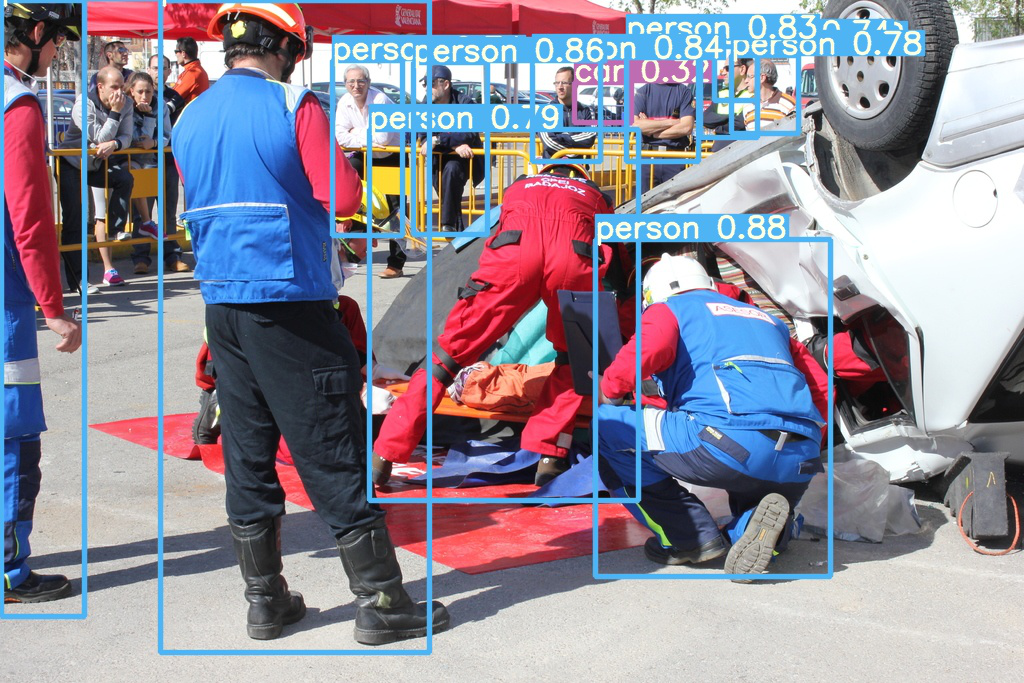

image_000000009.jpg


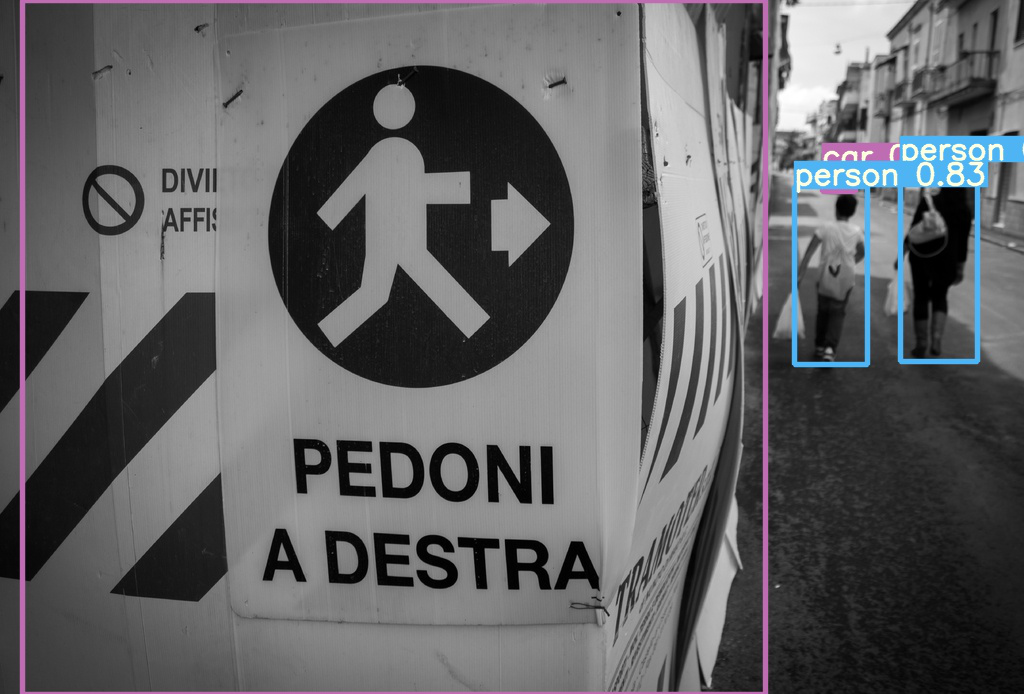

image_000000012.jpg


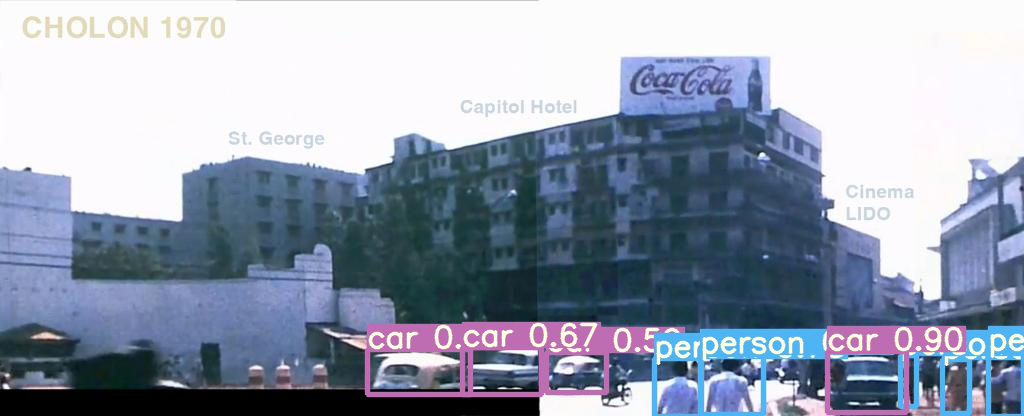

image_000000015.jpg


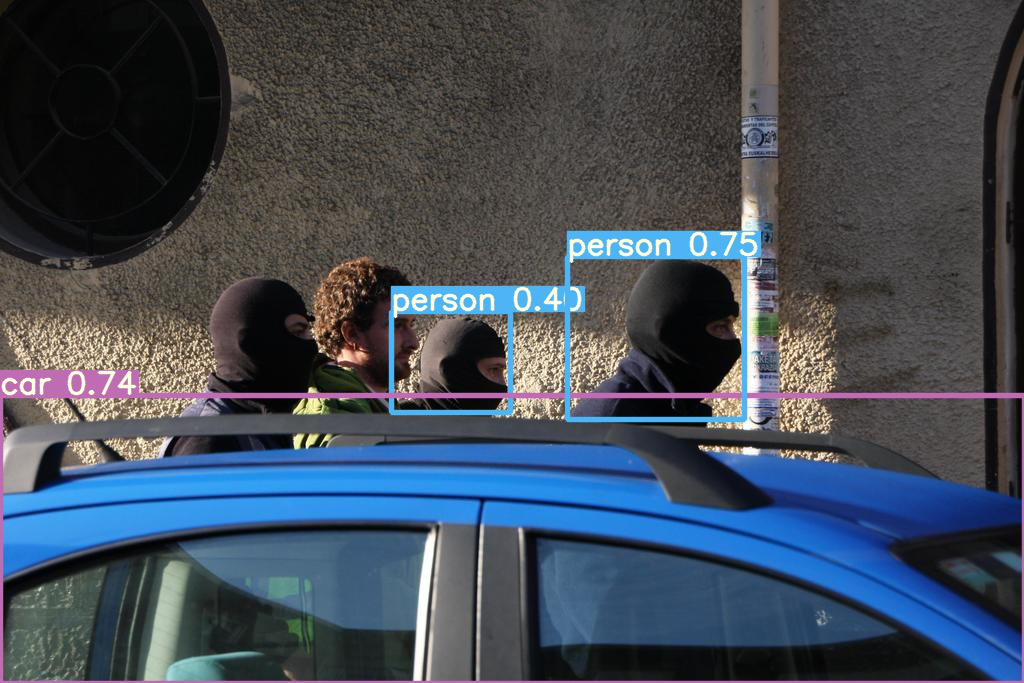

image_000000016.jpg


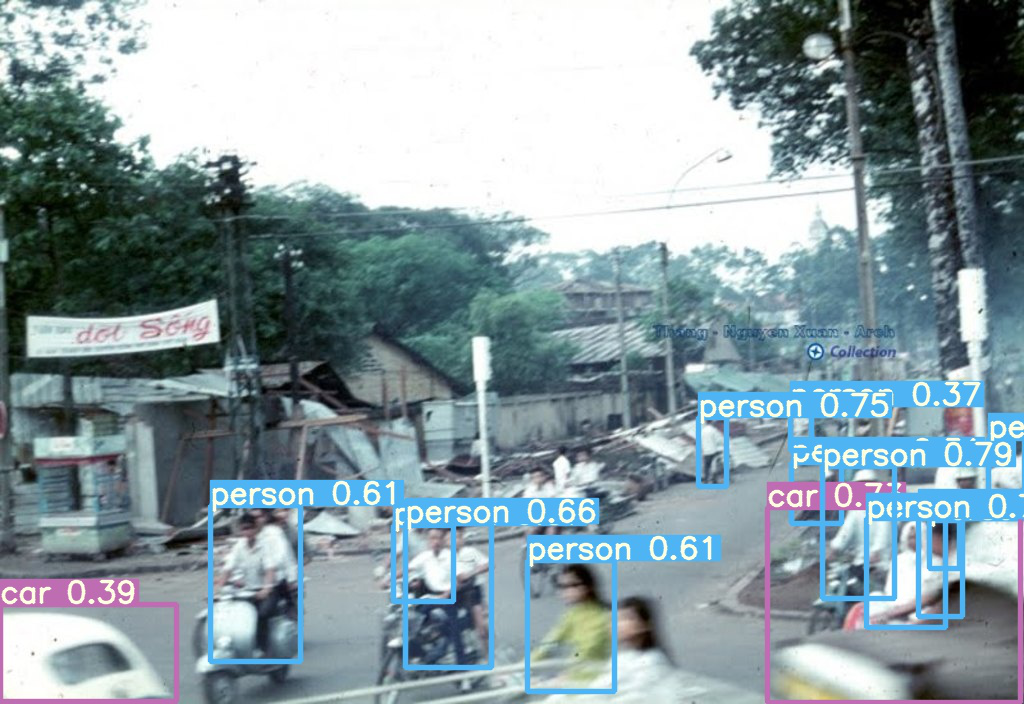

In [11]:
for img in glob.glob('runs/detect/exp5/*'):
    detection = Image.open(img).convert('RGB')
    print(os.path.basename(img))
       
    display.display(detection)


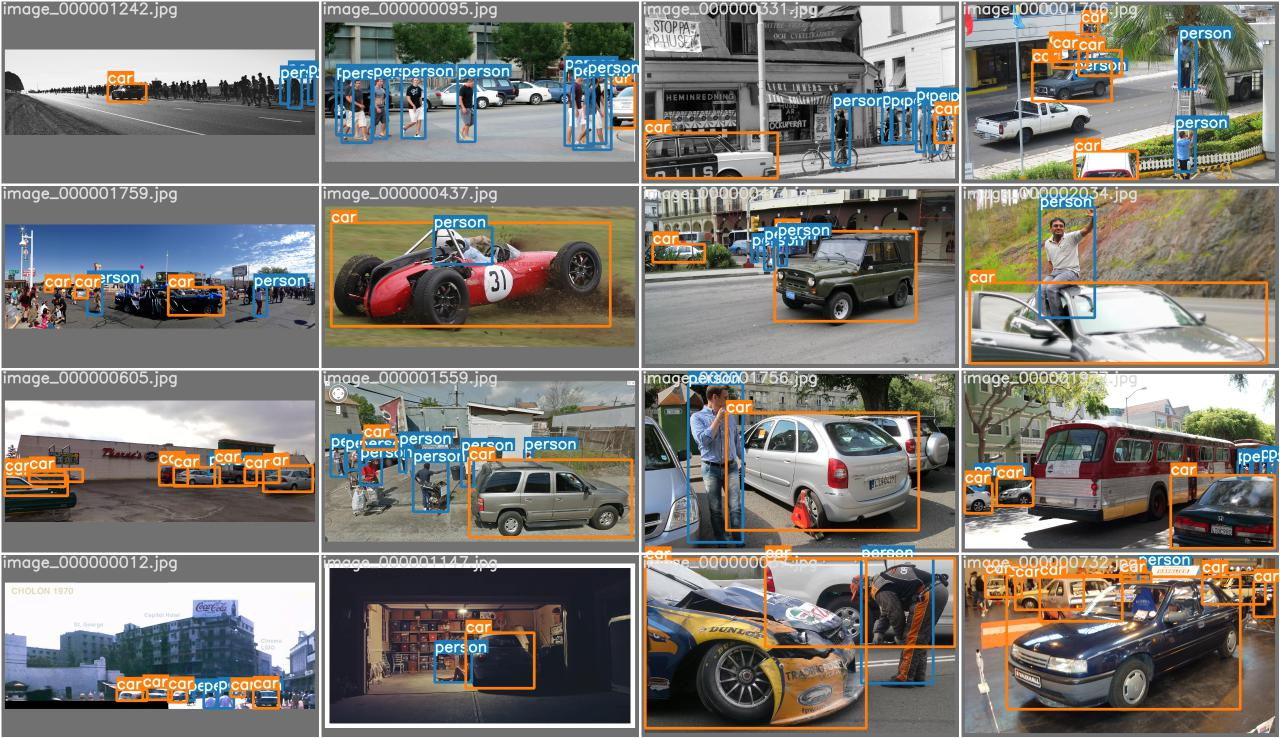

In [19]:
Image(filename='runs/train/custom/test_batch0_labels.jpg', width=800)  # train batch 0 mosaics and labels


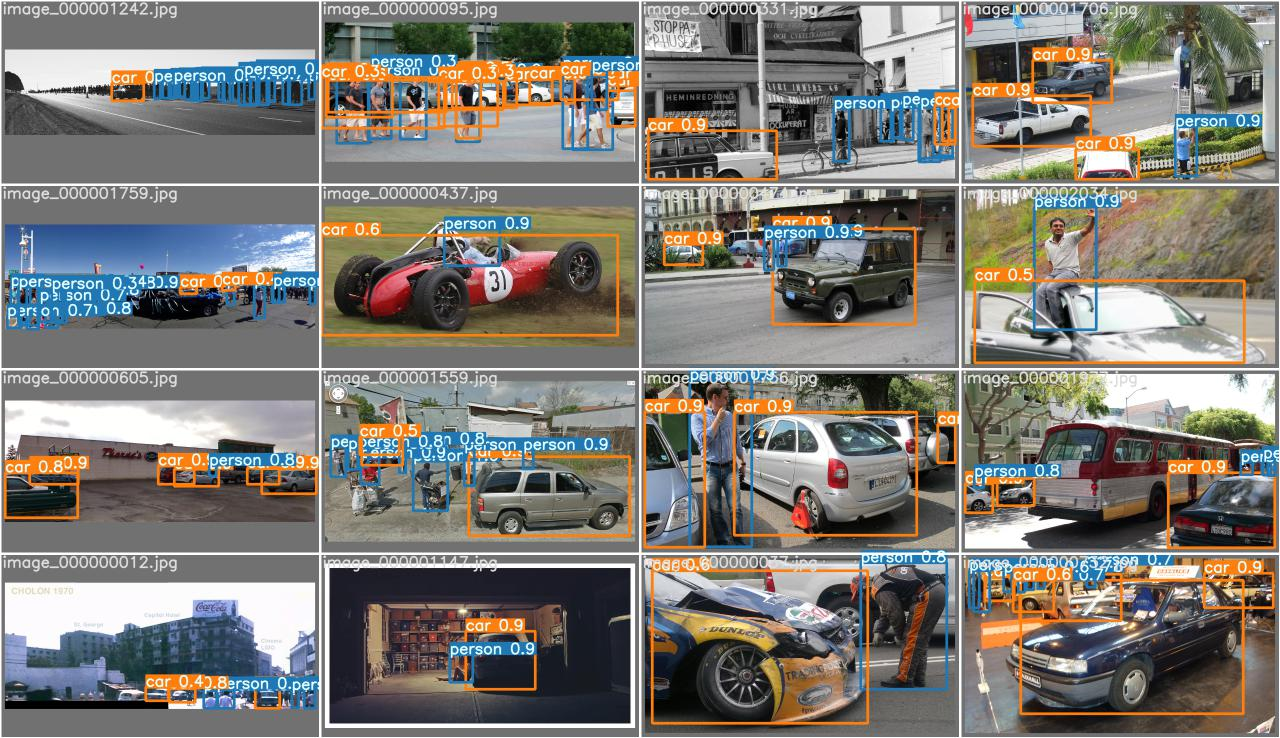

In [22]:
Image(filename='runs/train/custom/test_batch0_pred.jpg', width=800)  # Predictions


# Training Metrics

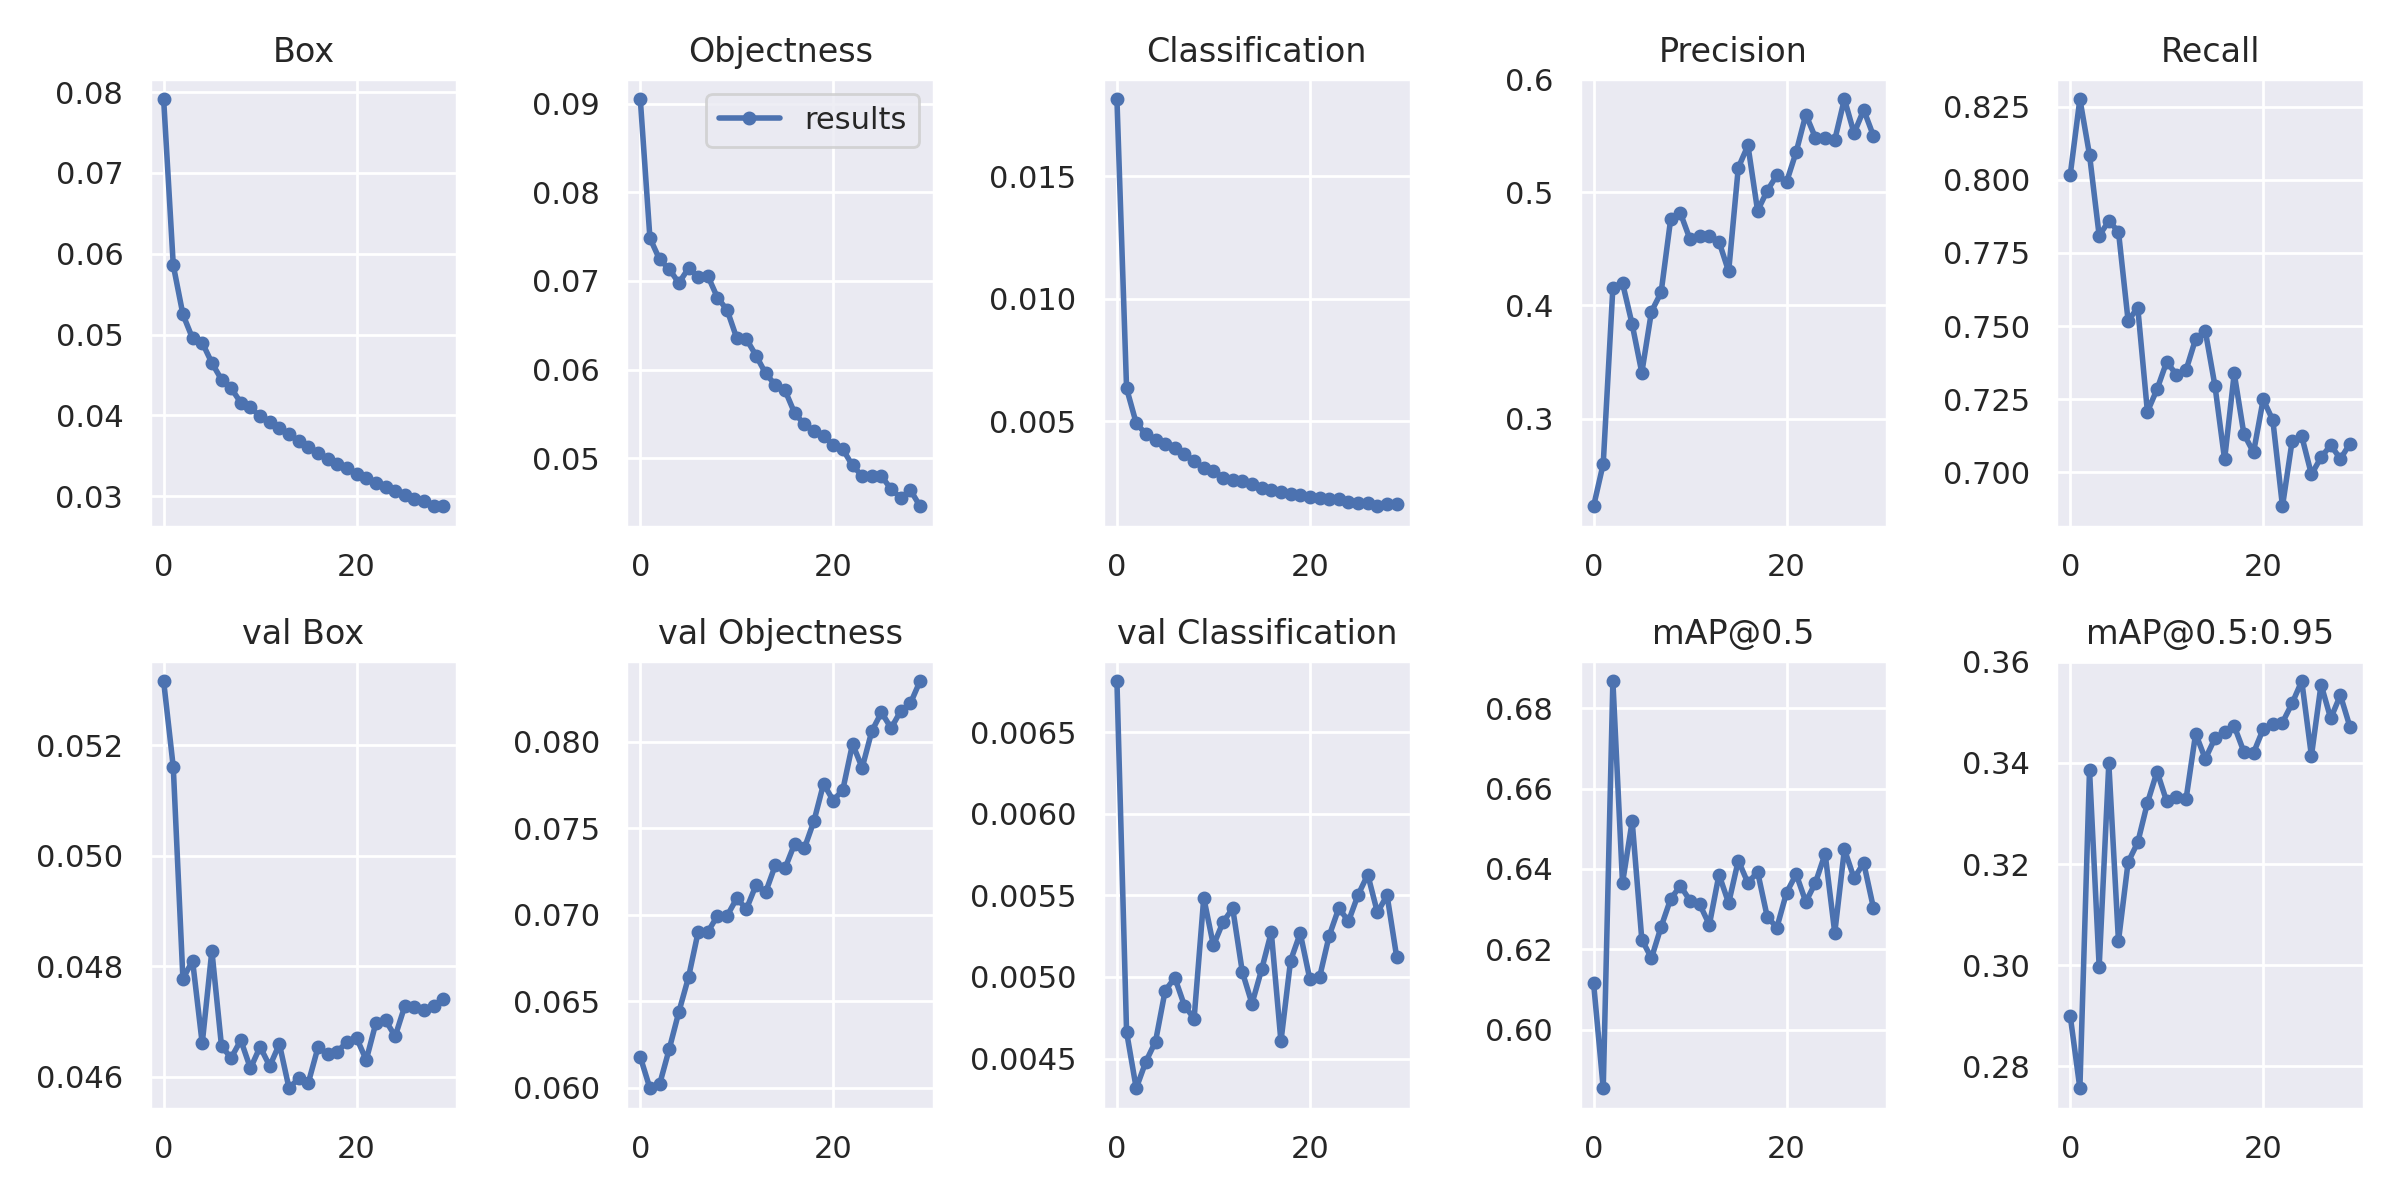

In [23]:
Image(filename='runs/train/custom/results.png', width=800)

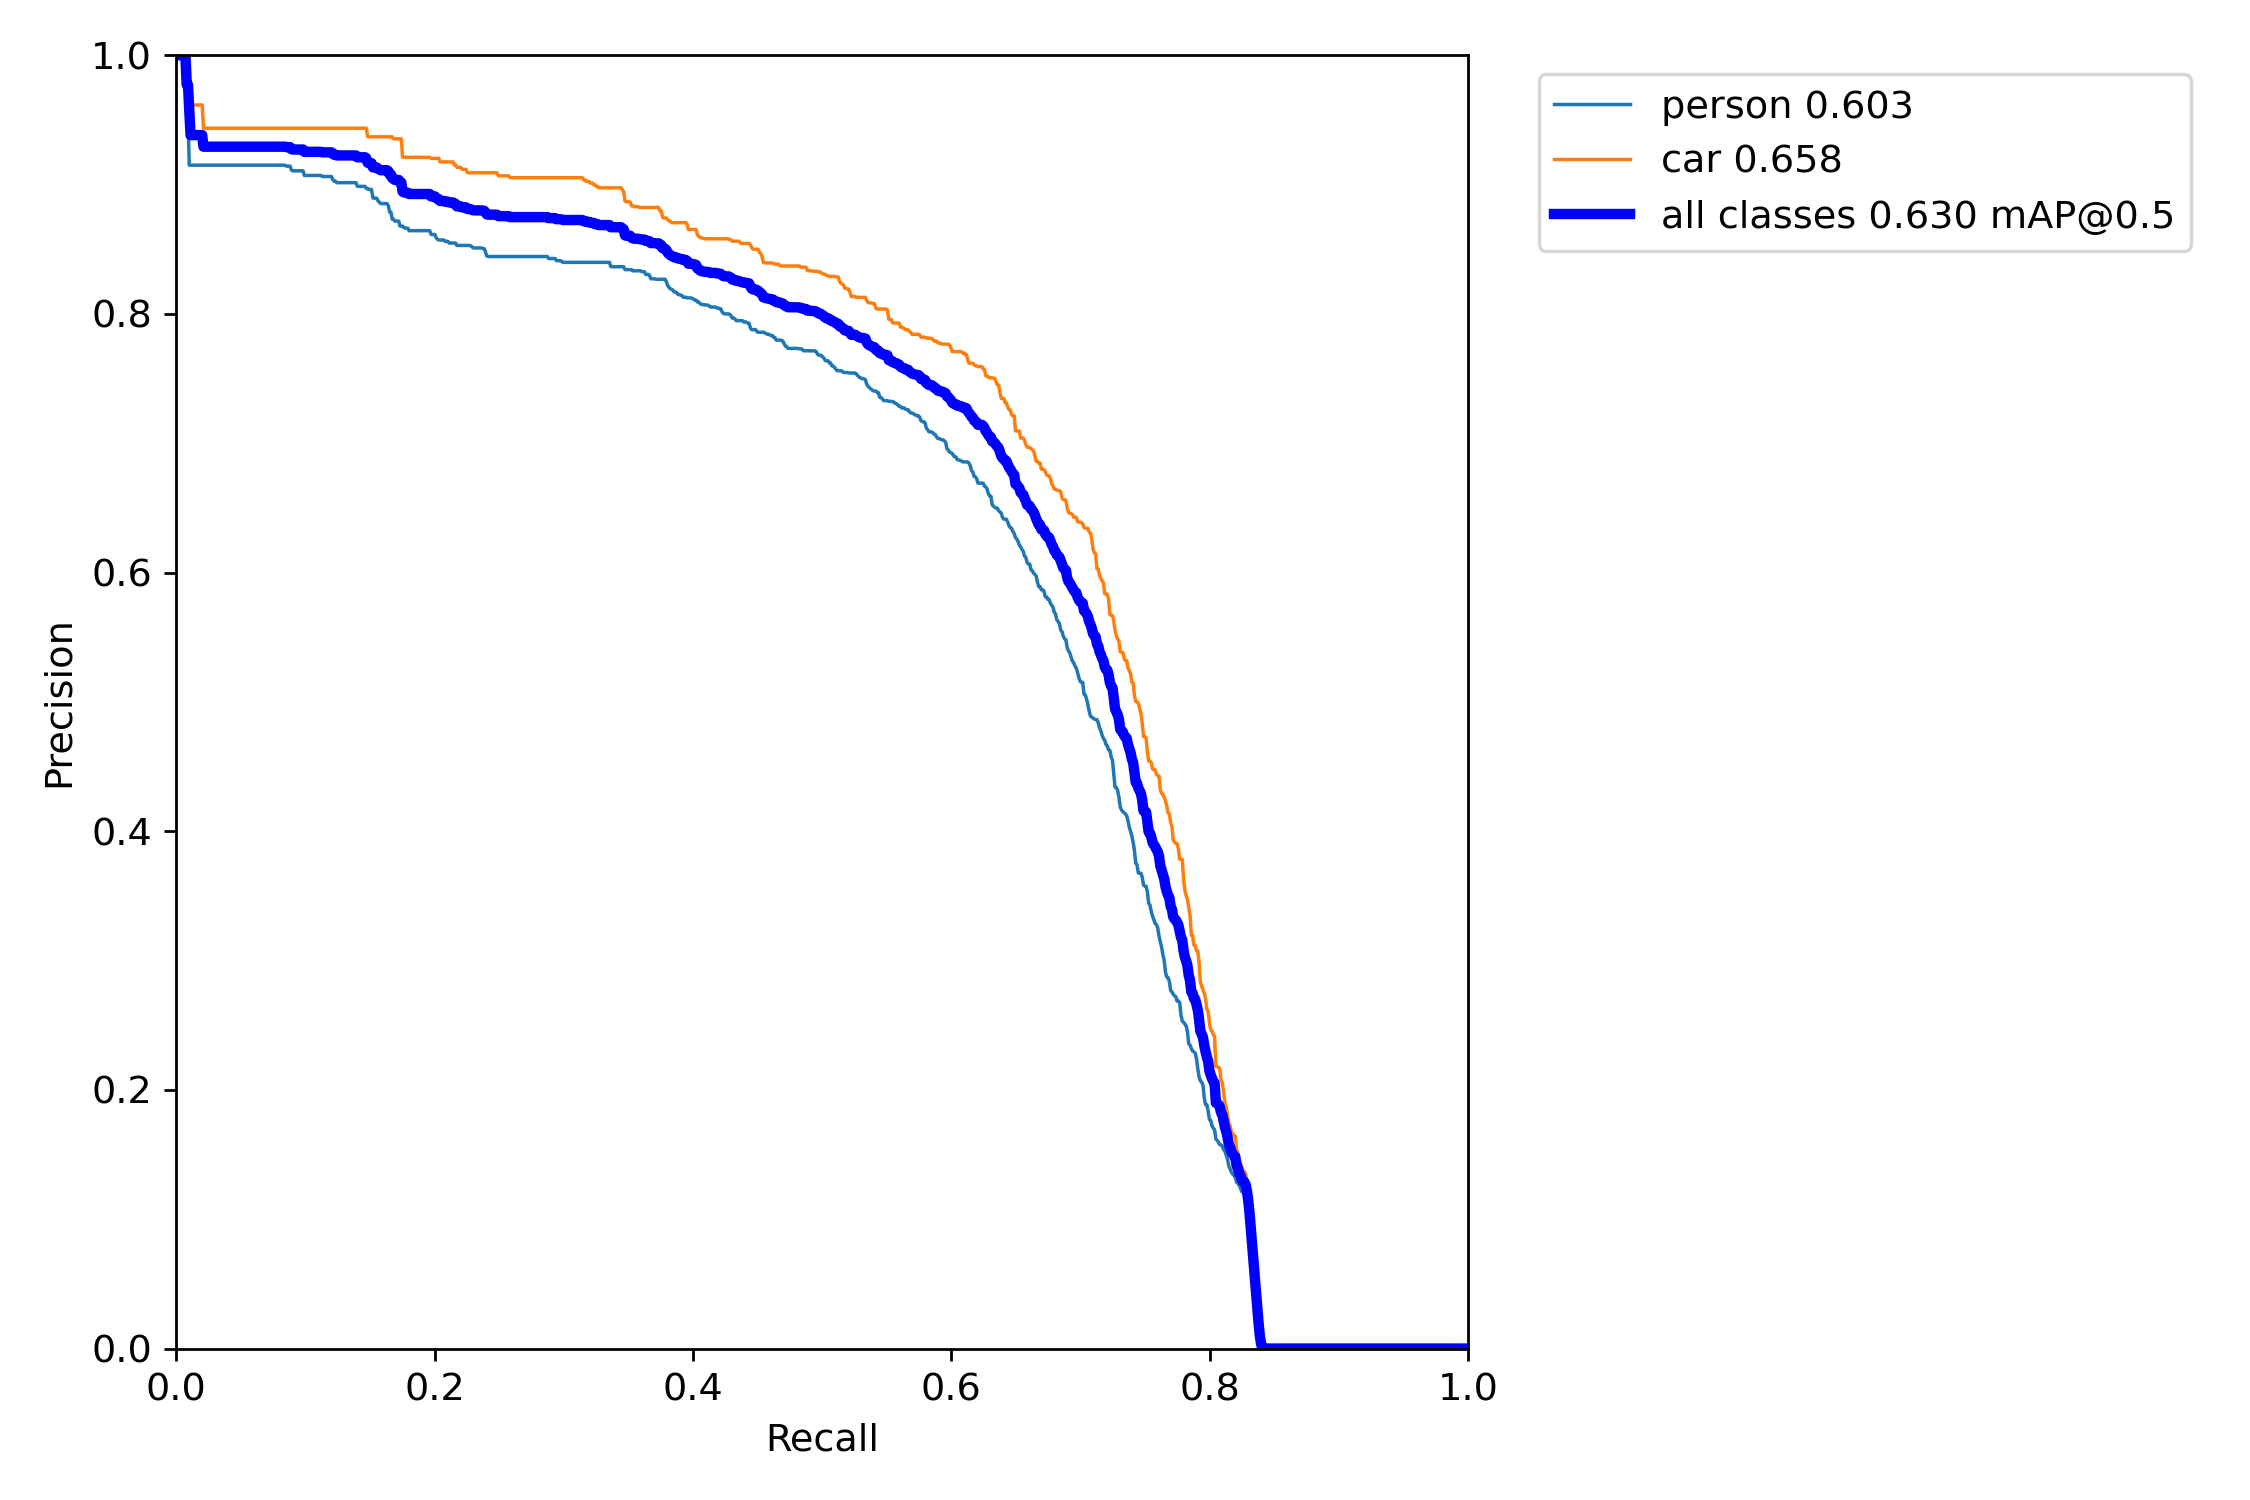

In [24]:
Image(filename='runs/train/custom/precision_recall_curve.png', width=800)